In [32]:
import pandas as pd
import numpy as np
import math, time, random, datetime


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
#print(plt.style.available)
#['seaborn-ticks', 'ggplot', 'dark_background', 'bmh', 'seaborn-poster', 'seaborn-notebook', 
#'fast', 'seaborn', 'classic', 'Solarize_Light2', 'seaborn-dark', 'seaborn-pastel', 'seaborn-muted', 
#'_classic_test', 'seaborn-paper', 'seaborn-colorblind', 'seaborn-bright', 'seaborn-talk', 'seaborn-dark-palette', 
#'tableau-colorblind10', 'seaborn-darkgrid', 'seaborn-whitegrid', 'fivethirtyeight', 'grayscale', 'seaborn-white', 
#'seaborn-deep']

#https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html

#Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

#Machine Learning

from sklearn.model_selection import train_test_split
from sklearn import model_selection,tree,preprocessing,metrics,linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostRegressor,CatBoostClassifier, Pool, cv

import warnings
warnings.filterwarnings('ignore')

In [33]:
train=pd.read_csv('../titanic/train.csv')
test=pd.read_csv('../titanic/test.csv')
gender_submission=pd.read_csv('../titanic/gender_submission.csv')

Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp=	# of siblings / spouses aboard the Titanic	
parch=	# of parents / children aboard the Titanic	
ticket=	Ticket number	
fare=	Passenger fare	
cabin=	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes



pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [34]:
train.head(8)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S

In [35]:
import missingno

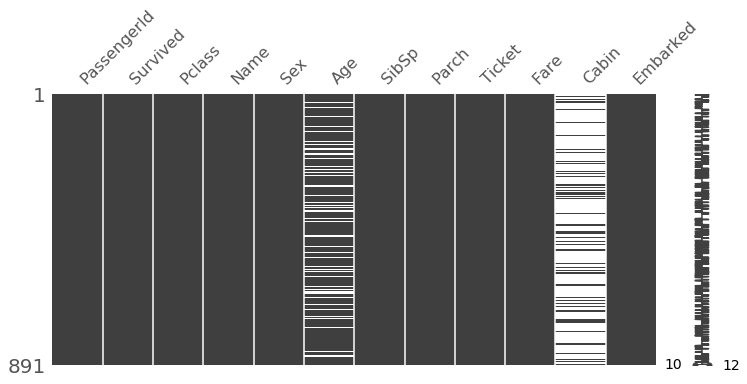

In [36]:
missingno.matrix(train,figsize=(12,5))

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [38]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
train.Tick.nunique()

AttributeError: 'DataFrame' object has no attribute 'Tick'

In [41]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame()

In [42]:
df_bin

Empty DataFrame
Columns: []
Index: []

0    549
1    342
Name: Survived, dtype: int64


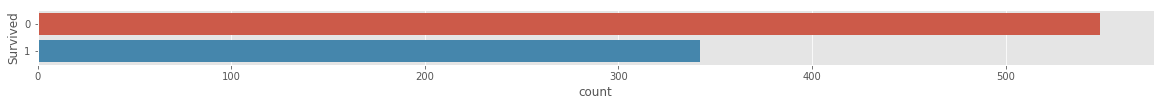

In [43]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [44]:
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

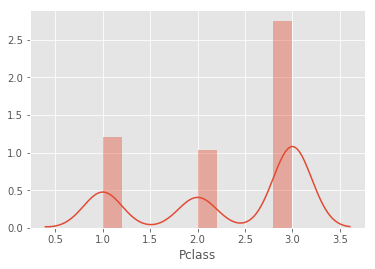

In [45]:
sns.distplot(train.Pclass)

In [46]:
def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

missing_values = find_missing_values(train, columns=train.columns)
missing_values

Number of missing or NaN values for each column:


{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [47]:

df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

In [48]:
# How many different names are there?
train.Name.value_counts()

Jardin, Mr. Jose Neto                                   1
Goodwin, Master. William Frederick                      1
Panula, Mr. Ernesti Arvid                               1
Cavendish, Mr. Tyrell William                           1
Touma, Mrs. Darwis (Hanne Youssef Razi)                 1
Peters, Miss. Katie                                     1
Sjostedt, Mr. Ernst Adolf                               1
O'Brien, Mr. Thomas                                     1
Harris, Mrs. Henry Birkhardt (Irene Wallach)            1
Milling, Mr. Jacob Christian                            1
Williams-Lambert, Mr. Fletcher Fellows                  1
Niskanen, Mr. Juha                                      1
Laleff, Mr. Kristo                                      1
Reynaldo, Ms. Encarnacion                               1
Madill, Miss. Georgette Alexandra                       1
Jussila, Mr. Eiriik                                     1
Carter, Rev. Ernest Courtenay                           1
Hart, Miss. Ev

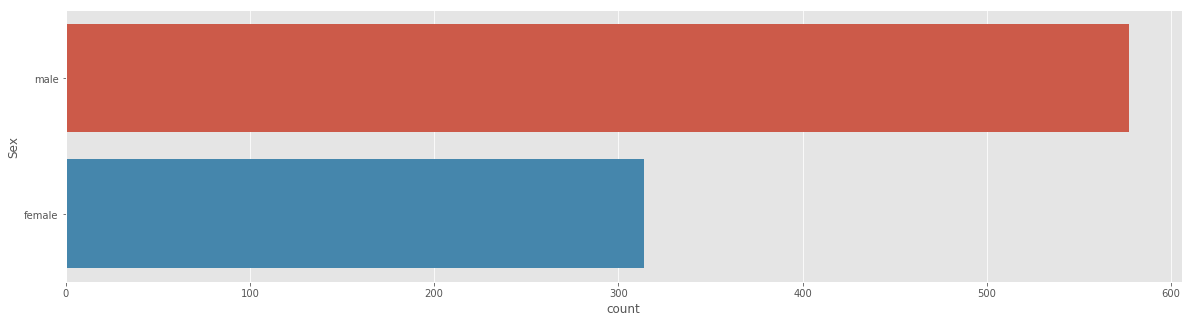

In [49]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train);

In [50]:
# add Sex to the subset dataframes
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female
df_con['Sex'] = train['Sex']

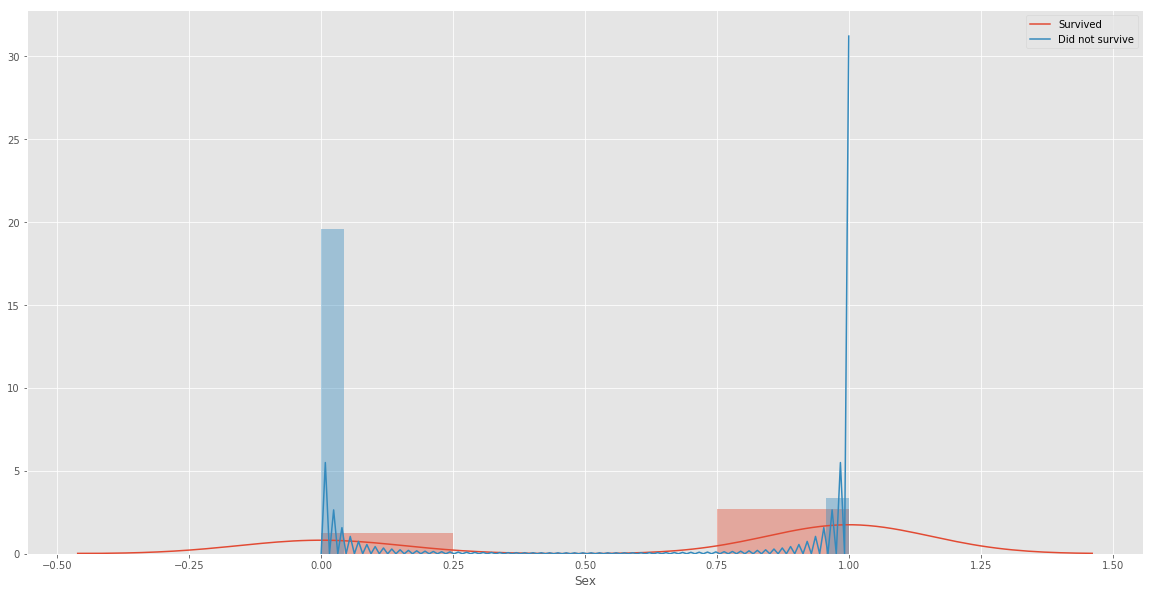

In [51]:
fig = plt.figure(figsize=(20, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

In [52]:
# Once the Age values have been fixed up, we can add them to our sub dataframes.
df_bin['Age'] = pd.cut(train['Age'], 10) # bucketed/binned into different categories
df_con['Age'] = train['Age'] # non-bucketed

In [53]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

In [54]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

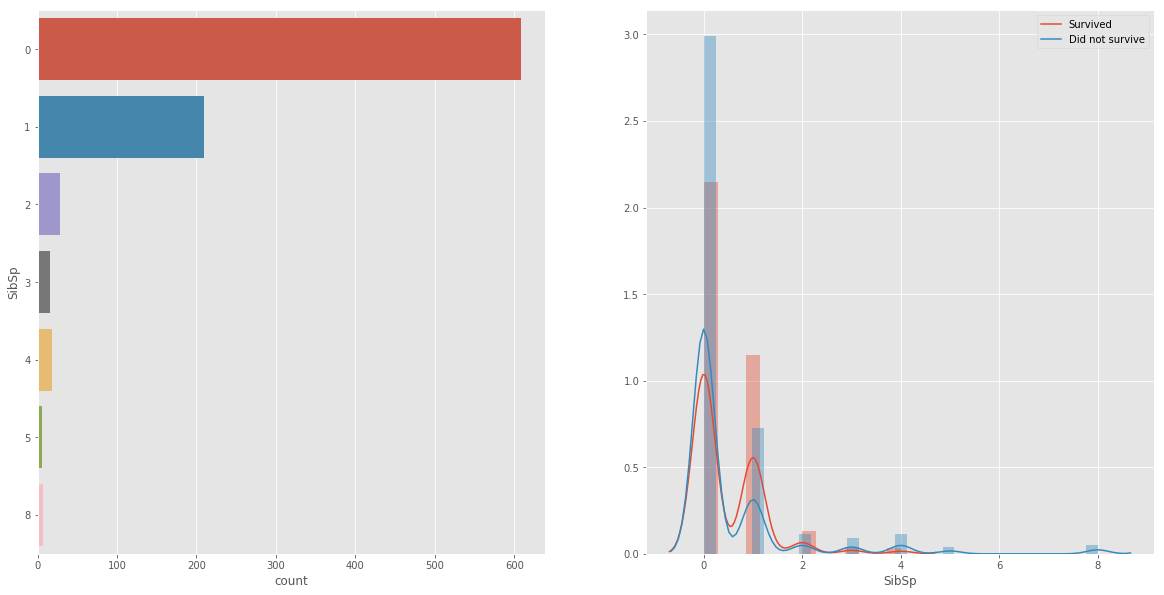

In [55]:
# against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

In [56]:
# Add Parch to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

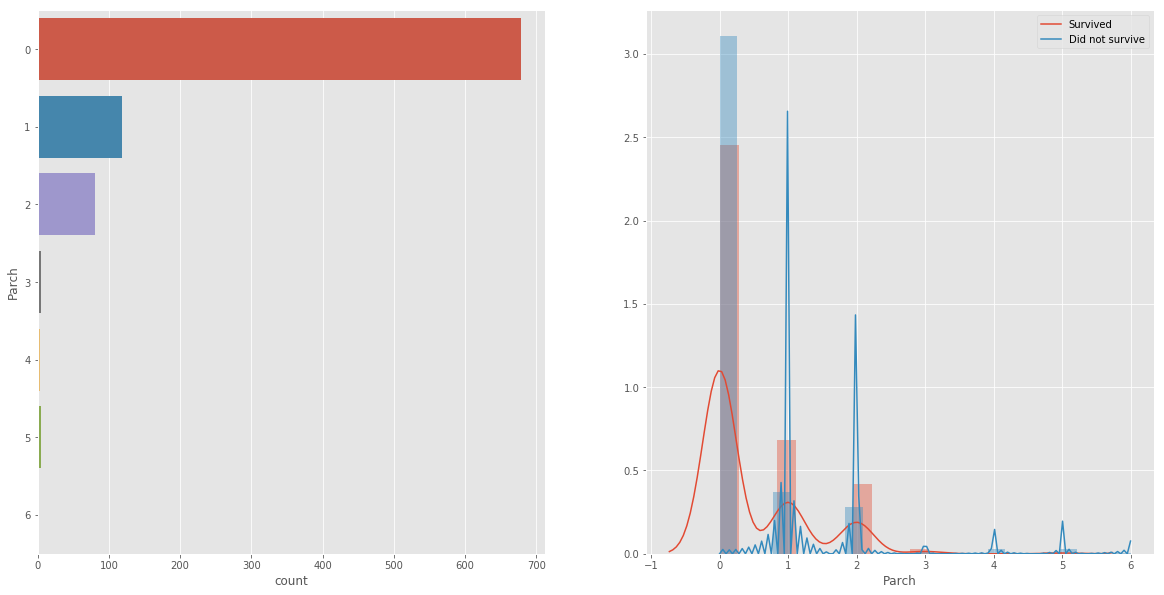

In [57]:
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

In [58]:
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised

In [59]:
df_con.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500

In [60]:
train[train['Embarked'== S]['Fare']]

NameError: name 'S' is not defined

In [62]:
missing_values['Fare']

0

In [63]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [64]:
# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


In [65]:
df_bin.head()

Survived  Pclass  Sex               Age  SibSp  Parch               Fare  \
0         0       3    0  (16.336, 24.294]      1      0  (-0.512, 102.466]   
1         1       1    1   (32.252, 40.21]      1      0  (-0.512, 102.466]   
2         1       3    1  (24.294, 32.252]      0      0  (-0.512, 102.466]   
3         1       1    1   (32.252, 40.21]      1      0  (-0.512, 102.466]   
4         0       3    0   (32.252, 40.21]      0      0  (-0.512, 102.466]   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S

In [66]:
one_hot_cols = df_bin.columns.tolist()

In [67]:
one_hot_cols.remove('Survived')

In [68]:
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

In [69]:
df_bin_enc

Survived  Pclass_1  Pclass_2  Pclass_3  Sex_0  Sex_1  Age_(0.34, 8.378]  \
0           0         0         0         1      1      0                  0   
1           1         1         0         0      0      1                  0   
2           1         0         0         1      0      1                  0   
3           1         1         0         0      0      1                  0   
4           0         0         0         1      1      0                  0   
5           0         0         0         1      1      0                  0   
6           0         1         0         0      1      0                  0   
7           0         0         0         1      1      0                  1   
8           1         0         0         1      0      1                  0   
9           1         0         1         0      0      1                  0   
10          1         0         0         1      0      1                  1   
11          1         1         0         0      0      1                  0   
12          0         0         0         1      1      0                  0   
13          0         0         0         1      1      0                  0   
14          0         0         0         1      0      1                  0   
15          1         0         1         0      0      1                  0   
16          0         0         0         1      1      0                  1   
17          1         0         1         0      1      0                  0   
18          0         0         0         1      0      1                  0   
19          1         0         0         1      0      1                  0   
20          0         0         1         0      1      0                  0   
21          1         0         1         0      1      0                  0   
22          1         0         0         1      0      1                  0   
23          1         1         0         0      1      0                  0   
24          0         0         0         1      0      1                  1   
25          1         0         0         1      0      1                  0   
26          0         0         0         1      1      0                  0   
27          0         1         0         0      1      0                  0   
28          1         0         0         1      0      1                  0   
29          0         0         0         1      1      0                  0   
..        ...       ...       ...       ...    ...    ...                ...   
861         0         0         1         0      1      0                  0   
862         1         1         0         0      0      1                  0   
863         0         0         0         1      0      1                  0   
864         0         0         1         0      1      0                  0   
865         1         0         1         0      0      1                  0   
866         1         0         1         0      0      1                  0   
867         0         1         0         0      1      0                  0   
868         0         0         0         1      1      0                  0   
869         1         0         0         1      1      0                  1   
870         0         0         0         1      1      0                  0   
871         1         1         0         0      0      1                  0   
872         0         1         0         0      1      0                  0   
873         0         0         0         1      1      0                  0   
874         1         0         1         0      0      1                  0   
875         1         0         0         1      0      1                  0   
876         0         0         0         1      1      0                  0   
877         0         0         0         1      1      0                  0   
878         0         0         0         1      1      0                  0   
879  

In [70]:
df_con_enc = df_con.apply(LabelEncoder().fit_transform)

df_con_enc.head(20)

Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0          0       2    1   28      1      0    18         2
1          1       0    0   51      1      0   207         0
2          1       2    0   34      0      0    41         2
3          1       0    0   47      1      0   189         2
4          0       2    1   47      0      0    43         2
5          0       2    1  101      0      0    51         1
6          0       0    1   69      0      0   186         2
7          0       2    1    6      3      1   124         2
8          1       2    0   35      0      2    74         2
9          1       1    0   18      1      0   154         0
10         1       2    0    8      1      1   110         2
11         1       0    0   74      0      0   143         2
12         0       2    1   25      0      0    43         2
13         0       2    1   52      1      5   158         2
14         0       2    0   18      0      0    36         2
15         1       1    0   70      0      0   108         2
16         0       2    1    6      4      1   151         1
17         1       1    1  120      0      0    85         2
18         0       2    0   41      1      0   113         2
19         1       2    0  110      0      0    16         0

In [71]:
selected_df = df_con_enc
selected_df.drop('Age',axis=1,inplace=True)
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [72]:
X_train

Pclass  Sex  SibSp  Parch  Fare  Embarked
0         2    1      1      0    18         2
1         0    0      1      0   207         0
2         2    0      0      0    41         2
3         0    0      1      0   189         2
4         2    1      0      0    43         2
5         2    1      0      0    51         1
6         0    1      0      0   186         2
7         2    1      3      1   124         2
8         2    0      0      2    74         2
9         1    0      1      0   154         0
10        2    0      1      1   110         2
11        0    0      0      0   143         2
12        2    1      0      0    43         2
13        2    1      1      5   158         2
14        2    0      0      0    36         2
15        1    0      0      0   108         2
16        2    1      4      1   151         1
17        1    1      0      0    85         2
18        2    0      1      0   113         2
19        2    0      0      0    16         0
20        1    1      0      0   138         2
21        1    1      0      0    85         2
22        2    0      0      0    42         1
23        0    1      0      0   168         2
24        2    0      3      1   124         2
25        2    0      1      5   159         2
26        2    1      0      0    16         0
27        0    1      3      2   245         2
28        2    0      0      0    38         1
29        2    1      0      0    40         2
..      ...  ...    ...    ...   ...       ...
861       1    1      1      0    76         2
862       0    0      0      0   137         2
863       2    0      6      2   205         2
864       1    1      0      0    85         2
865       1    0      0      0    85         2
866       1    0      1      0    89         0
867       0    1      0      0   184         2
868       2    1      0      0    64         2
869       2    1      1      1    74         2
870       2    1      0      0    40         2
871       0    0      1      1   188         2
872       0    1      0      0     2         2
873       2    1      0      0    58         2
874       1    0      1      0   132         0
875       2    0      0      0    16         0
876       2    1      0      0    69         2
877       2    1      0      0    40         2
878       2    1      0      0    40         2
879       0    0      0      1   220         0
880       1    0      0      1   138         2
881       2    1      0      0    40         2
882       2    0      0      0    73         2
883       1    1      0      0    72         2
884       2    1      0      0    12         2
885       2    0      0      5   151         1
886       1    1      0      0    85         2
887       0    0      0      0   153         2
888       2    0      1      2   131         2
889       0    1      0      0   153         0
890       2    1      0      0    30         1

[889 rows x 6 columns]

In [73]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [74]:

# Logistic Regression
start_time = time.time()
k=10
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(),
                                                  X_train,
                                                  y_train,
                                                  k)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.08
Accuracy CV 10-Fold: 78.52
Running Time: 0:00:02.680468


In [75]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 81.44
Accuracy CV 10-Fold: 73.68
Running Time: 0:00:00.054969


In [76]:

# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 76.72
Accuracy CV 10-Fold: 76.38
Running Time: 0:00:00.050974


In [77]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 69.74
Accuracy CV 10-Fold: 74.47
Running Time: 0:00:00.310822


In [78]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 42.52
Accuracy CV 10-Fold: 56.69
Running Time: 0:00:00.063962


In [79]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 79.53
Running Time: 0:00:00.059965


In [80]:

# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.39
Accuracy CV 10-Fold: 81.1
Running Time: 0:00:00.469732


In [81]:
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [82]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [83]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.016206
0:	learn: 0.6838699	total: 101ms	remaining: 1m 40s
1:	learn: 0.6753070	total: 147ms	remaining: 1m 13s
2:	learn: 0.6664907	total: 209ms	remaining: 1m 9s
3:	learn: 0.6580711	total: 254ms	remaining: 1m 3s
4:	learn: 0.6509907	total: 282ms	remaining: 56s
5:	learn: 0.6428456	total: 332ms	remaining: 55s
6:	learn: 0.6358374	total: 385ms	remaining: 54.6s
7:	learn: 0.6285425	total: 439ms	remaining: 54.4s
8:	learn: 0.6215779	total: 492ms	remaining: 54.2s
9:	learn: 0.6151968	total: 544ms	remaining: 53.9s
10:	learn: 0.6090478	total: 578ms	remaining: 52s
11:	learn: 0.6030273	total: 628ms	remaining: 51.7s
12:	learn: 0.5975315	total: 687ms	remaining: 52.2s
13:	learn: 0.5918302	total: 766ms	remaining: 53.9s
14:	learn: 0.5864084	total: 831ms	remaining: 54.6s
15:	learn: 0.5819175	total: 864ms	remaining: 53.1s
16:	learn: 0.5766028	total: 919ms	remaining: 53.2s
17:	learn: 0.5726184	total: 980ms	remaining: 53.5s
18:	learn: 0.5680301	total: 1.02s	remaining: 52.9s
19:	learn: 0.56

165:	learn: 0.4171787	total: 7.63s	remaining: 38.3s
166:	learn: 0.4169026	total: 7.68s	remaining: 38.3s
167:	learn: 0.4161844	total: 7.72s	remaining: 38.3s
168:	learn: 0.4159562	total: 7.76s	remaining: 38.2s
169:	learn: 0.4154877	total: 7.81s	remaining: 38.1s
170:	learn: 0.4153556	total: 7.87s	remaining: 38.1s
171:	learn: 0.4149683	total: 7.9s	remaining: 38s
172:	learn: 0.4145642	total: 7.94s	remaining: 37.9s
173:	learn: 0.4145372	total: 7.97s	remaining: 37.8s
174:	learn: 0.4143450	total: 8s	remaining: 37.7s
175:	learn: 0.4141462	total: 8.05s	remaining: 37.7s
176:	learn: 0.4140123	total: 8.09s	remaining: 37.6s
177:	learn: 0.4135955	total: 8.15s	remaining: 37.6s
178:	learn: 0.4134012	total: 8.19s	remaining: 37.6s
179:	learn: 0.4130787	total: 8.23s	remaining: 37.5s
180:	learn: 0.4128360	total: 8.28s	remaining: 37.5s
181:	learn: 0.4125693	total: 8.33s	remaining: 37.4s
182:	learn: 0.4125013	total: 8.35s	remaining: 37.3s
183:	learn: 0.4124307	total: 8.38s	remaining: 37.1s
184:	learn: 0.4122

330:	learn: 0.3969973	total: 13.6s	remaining: 27.5s
331:	learn: 0.3969770	total: 13.6s	remaining: 27.5s
332:	learn: 0.3969405	total: 13.7s	remaining: 27.4s
333:	learn: 0.3969396	total: 13.7s	remaining: 27.3s
334:	learn: 0.3969391	total: 13.7s	remaining: 27.3s
335:	learn: 0.3967876	total: 13.8s	remaining: 27.2s
336:	learn: 0.3967220	total: 13.8s	remaining: 27.2s
337:	learn: 0.3967161	total: 13.8s	remaining: 27.1s
338:	learn: 0.3966573	total: 13.9s	remaining: 27s
339:	learn: 0.3966380	total: 13.9s	remaining: 27s
340:	learn: 0.3966054	total: 13.9s	remaining: 26.9s
341:	learn: 0.3965558	total: 14s	remaining: 26.9s
342:	learn: 0.3962799	total: 14s	remaining: 26.8s
343:	learn: 0.3962155	total: 14s	remaining: 26.8s
344:	learn: 0.3959123	total: 14.1s	remaining: 26.7s
345:	learn: 0.3956901	total: 14.1s	remaining: 26.7s
346:	learn: 0.3956692	total: 14.2s	remaining: 26.6s
347:	learn: 0.3950075	total: 14.2s	remaining: 26.6s
348:	learn: 0.3949261	total: 14.3s	remaining: 26.6s
349:	learn: 0.3948790	

490:	learn: 0.3839203	total: 19.4s	remaining: 20.2s
491:	learn: 0.3837639	total: 19.5s	remaining: 20.1s
492:	learn: 0.3837638	total: 19.5s	remaining: 20.1s
493:	learn: 0.3835382	total: 19.6s	remaining: 20s
494:	learn: 0.3835009	total: 19.6s	remaining: 20s
495:	learn: 0.3833344	total: 19.7s	remaining: 20s
496:	learn: 0.3832367	total: 19.7s	remaining: 20s
497:	learn: 0.3832212	total: 19.7s	remaining: 19.9s
498:	learn: 0.3830626	total: 19.8s	remaining: 19.9s
499:	learn: 0.3830459	total: 19.8s	remaining: 19.8s
500:	learn: 0.3829690	total: 19.9s	remaining: 19.8s
501:	learn: 0.3828337	total: 19.9s	remaining: 19.8s
502:	learn: 0.3828168	total: 20s	remaining: 19.7s
503:	learn: 0.3825998	total: 20s	remaining: 19.7s
504:	learn: 0.3825270	total: 20.1s	remaining: 19.7s
505:	learn: 0.3824344	total: 20.1s	remaining: 19.7s
506:	learn: 0.3820660	total: 20.2s	remaining: 19.6s
507:	learn: 0.3818340	total: 20.2s	remaining: 19.6s
508:	learn: 0.3817030	total: 20.3s	remaining: 19.6s
509:	learn: 0.3816234	to

649:	learn: 0.3621747	total: 27.3s	remaining: 14.7s
650:	learn: 0.3619913	total: 27.4s	remaining: 14.7s
651:	learn: 0.3618259	total: 27.4s	remaining: 14.6s
652:	learn: 0.3617890	total: 27.5s	remaining: 14.6s
653:	learn: 0.3612898	total: 27.5s	remaining: 14.6s
654:	learn: 0.3610953	total: 27.6s	remaining: 14.5s
655:	learn: 0.3609770	total: 27.6s	remaining: 14.5s
656:	learn: 0.3609577	total: 27.7s	remaining: 14.4s
657:	learn: 0.3606282	total: 27.7s	remaining: 14.4s
658:	learn: 0.3605004	total: 27.8s	remaining: 14.4s
659:	learn: 0.3602644	total: 27.8s	remaining: 14.3s
660:	learn: 0.3602639	total: 27.9s	remaining: 14.3s
661:	learn: 0.3600838	total: 27.9s	remaining: 14.2s
662:	learn: 0.3600283	total: 27.9s	remaining: 14.2s
663:	learn: 0.3598159	total: 28s	remaining: 14.2s
664:	learn: 0.3596899	total: 28s	remaining: 14.1s
665:	learn: 0.3595761	total: 28.1s	remaining: 14.1s
666:	learn: 0.3593291	total: 28.2s	remaining: 14.1s
667:	learn: 0.3592784	total: 28.2s	remaining: 14s
668:	learn: 0.3592

809:	learn: 0.3430460	total: 35.6s	remaining: 8.36s
810:	learn: 0.3429989	total: 35.7s	remaining: 8.32s
811:	learn: 0.3429381	total: 35.7s	remaining: 8.27s
812:	learn: 0.3428201	total: 35.8s	remaining: 8.23s
813:	learn: 0.3427594	total: 35.8s	remaining: 8.19s
814:	learn: 0.3424765	total: 35.9s	remaining: 8.15s
815:	learn: 0.3424156	total: 35.9s	remaining: 8.1s
816:	learn: 0.3424136	total: 36s	remaining: 8.06s
817:	learn: 0.3423687	total: 36s	remaining: 8.02s
818:	learn: 0.3423522	total: 36.1s	remaining: 7.97s
819:	learn: 0.3420492	total: 36.1s	remaining: 7.93s
820:	learn: 0.3420076	total: 36.2s	remaining: 7.89s
821:	learn: 0.3419551	total: 36.2s	remaining: 7.84s
822:	learn: 0.3419001	total: 36.3s	remaining: 7.8s
823:	learn: 0.3417793	total: 36.3s	remaining: 7.76s
824:	learn: 0.3417636	total: 36.4s	remaining: 7.72s
825:	learn: 0.3417080	total: 36.4s	remaining: 7.68s
826:	learn: 0.3416637	total: 36.5s	remaining: 7.63s
827:	learn: 0.3415945	total: 36.5s	remaining: 7.59s
828:	learn: 0.3413

970:	learn: 0.3283302	total: 44.5s	remaining: 1.33s
971:	learn: 0.3282910	total: 44.5s	remaining: 1.28s
972:	learn: 0.3280432	total: 44.6s	remaining: 1.24s
973:	learn: 0.3280093	total: 44.6s	remaining: 1.19s
974:	learn: 0.3279368	total: 44.7s	remaining: 1.15s
975:	learn: 0.3279225	total: 44.7s	remaining: 1.1s
976:	learn: 0.3279020	total: 44.8s	remaining: 1.05s
977:	learn: 0.3277723	total: 44.9s	remaining: 1.01s
978:	learn: 0.3277269	total: 44.9s	remaining: 963ms
979:	learn: 0.3276846	total: 44.9s	remaining: 917ms
980:	learn: 0.3274380	total: 45s	remaining: 871ms
981:	learn: 0.3274083	total: 45.1s	remaining: 826ms
982:	learn: 0.3273469	total: 45.1s	remaining: 780ms
983:	learn: 0.3273045	total: 45.2s	remaining: 734ms
984:	learn: 0.3272711	total: 45.3s	remaining: 689ms
985:	learn: 0.3272217	total: 45.3s	remaining: 643ms
986:	learn: 0.3270304	total: 45.3s	remaining: 597ms
987:	learn: 0.3269853	total: 45.4s	remaining: 551ms
988:	learn: 0.3267262	total: 45.4s	remaining: 505ms
989:	learn: 0.3

In [84]:
# Perform CatBoost cross-validation
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6841287	test: 0.6840923	best: 0.6840923 (0)
1:	learn: 0.6750439	test: 0.6753762	best: 0.6753762 (1)
2:	learn: 0.6669693	test: 0.6672991	best: 0.6672991 (2)
3:	learn: 0.6589407	test: 0.6591867	best: 0.6591867 (3)
4:	learn: 0.6519100	test: 0.6519580	best: 0.6519580 (4)
5:	learn: 0.6442518	test: 0.6444684	best: 0.6444684 (5)
6:	learn: 0.6371571	test: 0.6374958	best: 0.6374958 (6)	total: 3.73s	remaining: 8m 49s
7:	learn: 0.6304055	test: 0.6308143	best: 0.6308143 (7)
8:	learn: 0.6243037	test: 0.6247544	best: 0.6247544 (8)
9:	learn: 0.6186814	test: 0.6191894	best: 0.6191894 (9)
10:	learn: 0.6127342	test: 0.6131437	best: 0.6131437 (10)
11:	learn: 0.6069234	test: 0.6074869	best: 0.6074869 (11)
12:	learn: 0.6011709	test: 0.6020871	best: 0.6020871 (12)
13:	learn: 0.5957293	test: 0.5964289	best: 0.5964289 (13)
14:	learn: 0.5901230	test: 0.5910113	best: 0.5910113 (14)
15:	learn: 0.5849213	test: 0.5861801	best: 0.5861801 (15)
16:	learn: 0.5804378	test: 0.5819195	best: 0.5819195 (16)
17:

326:	learn: 0.3964964	test: 0.4322276	best: 0.4322276 (326)
327:	learn: 0.3964551	test: 0.4322112	best: 0.4322112 (327)
328:	learn: 0.3963305	test: 0.4322523	best: 0.4322112 (327)
329:	learn: 0.3961050	test: 0.4320718	best: 0.4320718 (329)
330:	learn: 0.3959969	test: 0.4320582	best: 0.4320582 (330)
331:	learn: 0.3959117	test: 0.4320561	best: 0.4320561 (331)
332:	learn: 0.3957175	test: 0.4319963	best: 0.4319963 (332)
333:	learn: 0.3956380	test: 0.4319837	best: 0.4319837 (333)
334:	learn: 0.3955823	test: 0.4319998	best: 0.4319837 (333)
335:	learn: 0.3955426	test: 0.4319453	best: 0.4319453 (335)
336:	learn: 0.3953843	test: 0.4319104	best: 0.4319104 (336)
337:	learn: 0.3953291	test: 0.4318882	best: 0.4318882 (337)
338:	learn: 0.3952263	test: 0.4318679	best: 0.4318679 (338)
339:	learn: 0.3951486	test: 0.4318036	best: 0.4318036 (339)
340:	learn: 0.3950111	test: 0.4317385	best: 0.4317385 (340)
341:	learn: 0.3949708	test: 0.4317516	best: 0.4317385 (340)
342:	learn: 0.3948653	test: 0.4317558	be

689:	learn: 0.3591410	test: 0.4302847	best: 0.4293789 (629)
690:	learn: 0.3590668	test: 0.4303169	best: 0.4293789 (629)
691:	learn: 0.3590232	test: 0.4303205	best: 0.4293789 (629)
692:	learn: 0.3588959	test: 0.4303420	best: 0.4293789 (629)
693:	learn: 0.3588074	test: 0.4303154	best: 0.4293789 (629)
694:	learn: 0.3586858	test: 0.4303915	best: 0.4293789 (629)
695:	learn: 0.3585223	test: 0.4303993	best: 0.4293789 (629)
696:	learn: 0.3584305	test: 0.4303821	best: 0.4293789 (629)
697:	learn: 0.3583402	test: 0.4303998	best: 0.4293789 (629)
698:	learn: 0.3581835	test: 0.4304138	best: 0.4293789 (629)
699:	learn: 0.3580935	test: 0.4304029	best: 0.4293789 (629)
700:	learn: 0.3579880	test: 0.4303960	best: 0.4293789 (629)
701:	learn: 0.3578415	test: 0.4303134	best: 0.4293789 (629)
702:	learn: 0.3577598	test: 0.4302866	best: 0.4293789 (629)
703:	learn: 0.3576297	test: 0.4303833	best: 0.4293789 (629)
704:	learn: 0.3575117	test: 0.4304054	best: 0.4293789 (629)
705:	learn: 0.3573735	test: 0.4305119	be

In [85]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy CV 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 88.3
Accuracy CV 10-Fold: 81.66
Running Time: 0:09:38.926373


In [86]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


Model  Score
5               Decision Tree  92.46
7                    CatBoost  88.30
6     Gradient Boosting Trees  86.39
0                         KNN  81.44
1         Logistic Regression  79.08
2                 Naive Bayes  76.72
4                  Linear SVC  69.74
3  Stochastic Gradient Decent  42.52

In [87]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


Model  Score
7                    CatBoost  81.66
6     Gradient Boosting Trees  81.10
5               Decision Tree  79.53
1         Logistic Regression  78.52
2                 Naive Bayes  76.38
4                  Linear SVC  74.47
0                         KNN  73.68
3  Stochastic Gradient Decent  56.69

In [88]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

imp       col
2   8.867417     SibSp
5  10.456826  Embarked
3  13.146866     Parch
4  14.632381      Fare
0  22.230110    Pclass
1  30.666401       Sex

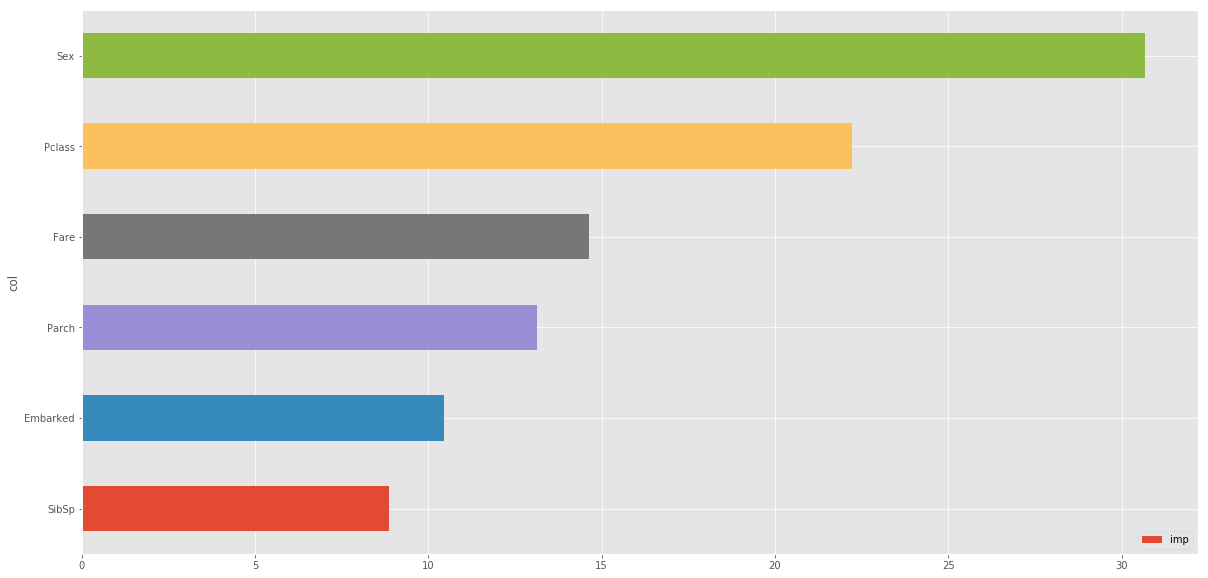

In [89]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

In [90]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

Precision: 0.8885236676836308
Recall: 0.7299352941176471
F1: 0.8005888485845598
AUC: 0.9094382299367834


In [92]:
# We need our test dataframe to look like this one
X_train.head()

Pclass  Sex  SibSp  Parch  Fare  Embarked
0       2    1      1      0    18         2
1       0    0      1      0   207         0
2       2    0      0      0    41         2
3       0    0      1      0   189         2
4       2    1      0      0    43         2

In [95]:
# Our test dataframe has some columns our model hasn't been trained on
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [96]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [97]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns]
                                     .apply(LabelEncoder().fit_transform))

In [98]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1.])

In [99]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

PassengerId  Survived
0          892       0.0
1          893       0.0
2          894       0.0
3          895       0.0
4          896       0.0

In [100]:
# What does our submission have to look like?
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [101]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [102]:
# How does our submission dataframe look?
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0

In [103]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [104]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('../catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [105]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../catboost_submission.csv")
submissions_check.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0